In [60]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving musical.csv to musical.csv


In [61]:
df = pd.read_csv("musical.csv", sep=',')
df.head()

,Carimbo de data/hora,Que tipo(s) de instrumento(s) você toca?,Como aconteceu o seu aprendizado?,Você possui uma relação profissional com a música?,Você pratica e tem contato com outros músicos?,Há quanto tempo você pratica um instrumento musical?,Quantas vezes por semana você pratica algum instrumento musical?,"Indique o quanto você concorda com a seguinte afirmação: ""após a prática musical sinto menos estresse e ansiedade""?","Indique o quanto você concorda com a seguinte afirmação: ""a música cumpre um papel fundamental no meu bem-estar e na minha saúde mental""?"
0,04/05/2025 22:45:13,"voz (canto, beatbox),cordas beliscadas (violão...",predominantemente orientado: aprendi a maior p...,Não,Não,7 anos ou mais,5 ou mais,5,4
1,05/05/2025 10:04:28,"cordas percutidas (piano, teclado...)",predominantemente orientado: aprendi a maior p...,Sim,Sim,7 anos ou mais,1 - 2,4,5
2,05/05/2025 10:05:29,"voz (canto, beatbox),cordas beliscadas (violão...",predominantemente orientado: aprendi a maior p...,Não,Sim,7 anos ou mais,1 - 2,4,3
3,05/05/2025 10:15:16,"cordas beliscadas (violão, guitarra, baixo...)",predominantemente orientado: aprendi a maior p...,Não,Não,Alguns meses,0 (não estou praticando),4,3
4,05/05/2025 10:15:30,"voz (canto, beatbox),cordas beliscadas (violão...",autodidata: aprendi tudo o que sei sozinho,Não,Sim,7 anos ou mais,1 - 2,4,4


In [62]:
# Renomeando as colunas
df.rename(columns={
    'Carimbo de data/hora': 'data_hora',
    'Que tipo(s) de instrumento(s) você toca?': 'tipo_instrumento',
    'Como aconteceu o seu aprendizado?': 'aprendizado',
    'Você possui uma relação profissional com a música?': 'profissional',
    'Você pratica e tem contato com outros músicos?': 'outros_musicos',
    'Há quanto tempo você pratica um instrumento musical?': 'tempo',
    'Quantas vezes por semana você pratica algum instrumento musical?': 'semanal',
    'Indique o quanto você concorda com a seguinte afirmação: "após a prática musical sinto menos estresse e ansiedade"?': 'concorda_estresse',
    'Indique o quanto você concorda com a seguinte afirmação: "a música cumpre um papel fundamental no meu bem-estar e na minha saúde mental"?': 'concorda_saude_mental',
}, inplace=True)
df.head()

,data_hora,tipo_instrumento,aprendizado,profissional,outros_musicos,tempo,semanal,concorda_estresse,concorda_saude_mental
0,04/05/2025 22:45:13,"voz (canto, beatbox),cordas beliscadas (violão...",predominantemente orientado: aprendi a maior p...,Não,Não,7 anos ou mais,5 ou mais,5,4
1,05/05/2025 10:04:28,"cordas percutidas (piano, teclado...)",predominantemente orientado: aprendi a maior p...,Sim,Sim,7 anos ou mais,1 - 2,4,5
2,05/05/2025 10:05:29,"voz (canto, beatbox),cordas beliscadas (violão...",predominantemente orientado: aprendi a maior p...,Não,Sim,7 anos ou mais,1 - 2,4,3
3,05/05/2025 10:15:16,"cordas beliscadas (violão, guitarra, baixo...)",predominantemente orientado: aprendi a maior p...,Não,Não,Alguns meses,0 (não estou praticando),4,3
4,05/05/2025 10:15:30,"voz (canto, beatbox),cordas beliscadas (violão...",autodidata: aprendi tudo o que sei sozinho,Não,Sim,7 anos ou mais,1 - 2,4,4


In [16]:
# Tabela de frequências para "Como aconteceu o seu aprendizado?"
df_aprendizado_freq = pd.DataFrame({
    'freq_abs': df['aprendizado'].value_counts(sort=False),
    'freq_rel': df['aprendizado'].value_counts(sort=False, normalize=True),
})
df_aprendizado_freq['freq_acum'] = df_aprendizado_freq['freq_abs'].cumsum()
df_aprendizado_freq = df_aprendizado_freq.sort_values(by=['freq_abs'], ascending=False)
df_aprendizado_freq.head()

,freq_abs,freq_rel,freq_acum
aprendizado,,,
predominantemente orientado: aprendi a maior parte do que sei com aulas,13,0.619048,13
predominantemente autodidata: aprendi a maior parte do que sei sozinho,5,0.238095,20
autodidata: aprendi tudo o que sei sozinho,2,0.095238,15
orientado: tudo o que sei aprendi com professores de música,1,0.047619,21


In [17]:
# Tabela de frequências para
# "Há quanto tempo você pratica um instrumento musical?"
df_tempo_freq = pd.DataFrame({
    'freq_abs': df['tempo'].value_counts(sort=False),
    'freq_rel': df['tempo'].value_counts(sort=False, normalize=True),
})
df_tempo_freq['freq_acum'] = df_tempo_freq['freq_abs'].cumsum()
df_tempo_freq = df_tempo_freq.sort_values(by=['freq_abs'], ascending=False)
df_tempo_freq.head()

,freq_abs,freq_rel,freq_acum
tempo,,,
7 anos ou mais,14,0.666667,14
Até 7 anos,4,0.190476,20
Alguns meses,2,0.095238,16
Até 3 anos,1,0.047619,21


In [18]:
# Tabela de frequências para
# "Quantas vezes por semana você pratica algum instrumento musical?"
df_semanal_freq = pd.DataFrame({
    'freq_abs': df['semanal'].value_counts(sort=False),
    'freq_rel': df['semanal'].value_counts(sort=False, normalize=True),
})
df_semanal_freq['freq_acum'] = df_semanal_freq['freq_abs'].cumsum()
df_semanal_freq = df_semanal_freq.sort_values(by=['freq_abs'], ascending=False)
df_semanal_freq.head()

,freq_abs,freq_rel,freq_acum
semanal,,,
1 - 2,9,0.428571,14
5 ou mais,5,0.238095,5
3 - 4,5,0.238095,21
0 (não estou praticando),2,0.095238,16


In [23]:
# Média, mediana e moda da pergunta "Indique o quanto você concorda com a
# seguinte afirmação: "após a prática musical sinto menos estresse e
# ansiedade"?"

media = df['concorda_estresse'].mean()
mediana = df['concorda_estresse'].median()
moda = df['concorda_estresse'].mode()
print('média: ', media)
print('mediana: ', mediana)
print('moda: ', moda[0])

média:  4.285714285714286
mediana:  4.0
moda:  4


In [25]:
# Média, mediana e moda da pergunta "Indique o quanto você concorda com a
# seguinte afirmação: "a música cumpre um papel fundamental no meu bem-estar e
# na minha saúde mental"?"?

media = df['concorda_saude_mental'].mean()
mediana = df['concorda_saude_mental'].median()
moda = df['concorda_saude_mental'].mode()
print('média: ', media)
print('mediana: ', mediana)
print('moda: ', moda[0])

média:  4.095238095238095
mediana:  5.0
moda:  5


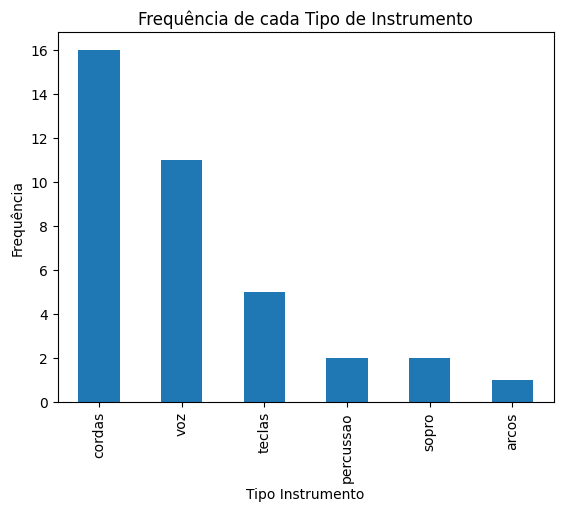

In [63]:
from os import replace
import matplotlib.pyplot as plt

df['tipo_instrumento'] = df['tipo_instrumento'].str.replace('voz (canto, beatbox)', 'voz')
df['tipo_instrumento'] = df['tipo_instrumento'].str.replace('cordas beliscadas (violão, guitarra, baixo...)', 'cordas')
df['tipo_instrumento'] = df['tipo_instrumento'].str.replace('cordas friccionadas (violino, violoncelo...)', 'arcos')
df['tipo_instrumento'] = df['tipo_instrumento'].str.replace('sopro (flauta, clarinete, saxofone...)', 'sopro')
df['tipo_instrumento'] = df['tipo_instrumento'].str.replace('percussão (bateria, agogô, tamborim...)', 'percussao')
df['tipo_instrumento'] = df['tipo_instrumento'].str.replace('cordas percutidas (piano, teclado...)', 'teclas')

df['tipo_instrumento'] = df['tipo_instrumento'].str.split(',')
df_explodido = df.explode('tipo_instrumento')

contagem = df_explodido['tipo_instrumento'].value_counts()

contagem.plot(kind='bar')
plt.xlabel('Tipo Instrumento')
plt.ylabel('Frequência')
plt.title('Frequência de cada Tipo de Instrumento')
plt.show()

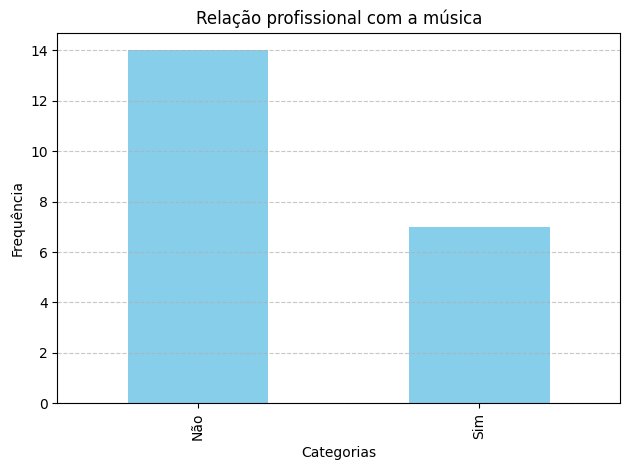

In [65]:
frequencia = df['profissional'].value_counts()
frequencia.plot(kind='bar', color='skyblue')
plt.title('Relação profissional com a música')
plt.xlabel('Categorias')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()